# Estudo de Séries Temporais com Python
 - O objetivo deste notebook é o estudo de algumas funções para o tratamento de Séries Temporais.

In [1]:
# Carregando bibliotecas iniciais
import pandas as pd 
import warnings
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Carregando os dados

In [2]:
# Importando os dados.
df_AirPassengers = pd.read_csv('./base_dados/AirPassengers.csv')

In [3]:
# Olhando as primeiras linhas 
df_AirPassengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Shape do dataset original
df_AirPassengers.shape

(144, 2)

In [5]:
# Olhando os valores únicos
df_AirPassengers.nunique()

Month          144
#Passengers    118
dtype: int64

In [6]:
# Verificando os tipos dos dados e formato dos dados
df_AirPassengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [7]:
# Observando algumas medidas
df_AirPassengers.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Criado a Série Temporal (TS)

In [8]:
# Converte a coluna Month para Data no formato 'YYYY-MM-DD'
df_AirPassengers.Month = pd.to_datetime(df_AirPassengers.Month)

In [9]:
# Define o atributo Month como Index
df_AirPassengers = df_AirPassengers.set_index('Month')

In [10]:
# Verificando o Index
df_AirPassengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
# Criando um objeto Series do Pandas
ts = df_AirPassengers['#Passengers']

In [12]:
# Verificando o tipo do objeto criado
type(ts)

pandas.core.series.Series

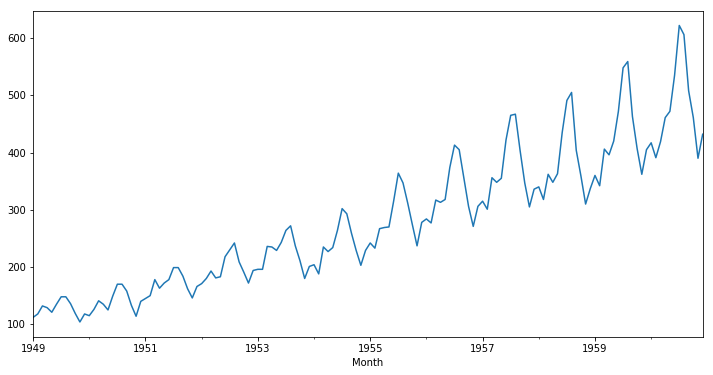

In [13]:
# Plotando a Série Temporal (TS) 
ts.plot(figsize=(12,6))

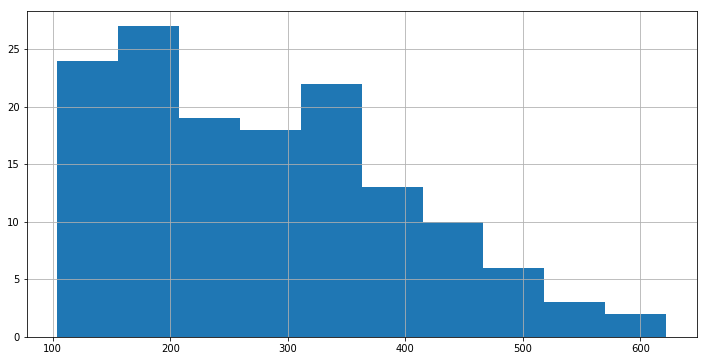

In [14]:
# Olhando a Distribuição dos dados da Série
ts.hist(figsize=(12,6))

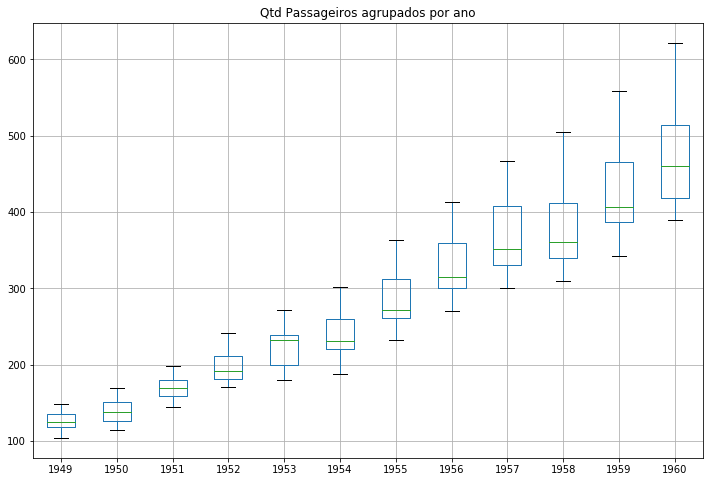

In [15]:
# Visualizado os dados agrupados por ano
grupos = df_AirPassengers.groupby(pd.Grouper(freq='Y'))
df_anos = pd.DataFrame()

for nome, grupo in grupos:
    df_anos[nome.year] = grupo.values.squeeze()
df_anos.boxplot(figsize=(12,8))

plt.title('Qtd Passageiros agrupados por ano')
plt.show()

# Verificando a estacionariedade da Série Temporal (TS)
- De modo geral podemos considerar uma TS estacionária se as suas propriedades estatísticas, tais como a média e variância permanecem constantes ao longo do tempo.
- Para efeitos práticos neste estudo vamos assumir a série como estacionária se ela tiver as seguintes propriedades estatísticas constantes ao longo do tempo: <br>
 1 - Uma média constante  <br>
 2 - Uma variância constante  <br>
 3 - Uma autocovariância que não dependa do tempo <br>

 
<h4> TESTES DE ESTACIONARIEDADE</h4>

- Teste de Dickey-Fuller Aumentado<br>
- Teste de Phillips - Perron<br>
- Teste KPSS - Kwiatkowski-Phillips-Schmidt-Shin <br>

** OBS: Em um contexto geral, o ideal é aplicar os testes em conjunto para ter a certeza da estacionariedade da série.

In [16]:
# Verificando se a Série Temporal (TS) é estacionária
# Augmented Dickey-Fuller unit root test
# The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation
# Null Hypothesis: The series has a unit root (value of a =1)
# Alternate Hypothesis: The series has no unit root
from statsmodels.tsa.stattools import adfuller
adfuller_teste = adfuller(ts)

adf_statistic = adfuller_teste[0] # Test statistic
adf_pvalue = adfuller_teste[1] #  MacKinnon’s approximate p-value based on MacKinnon (1994, 2010)
adf_usedlag = adfuller_teste[2] #  Number of lags used
adf_nobs = adfuller_teste[3] #  Number of observations used for the ADF regression and calculation of the critical values
adf_critical_values = adfuller_teste[4] # Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)
adf_icbest= adfuller_teste[5] # The maximized information criterion if autolag is not None.

print('Results Augmented Dickey-Fuller Test')
print('====================================')
print('Test Statistic: %.3f \nP-value: %.3f \nLags: %d' % (adf_statistic, adf_pvalue, adf_usedlag))
print('-------------------------------------')
print('Number of observations: %d \nCritical Values: %s' % (adf_nobs, adf_critical_values))


Results Augmented Dickey-Fuller Test
Test Statistic: 0.815 
P-value: 0.992 
Lags: 13
-------------------------------------
Number of observations: 130 
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.5787700591715979}


In [17]:
# Verificando se a Série Temporal (TS) é estacionária
# Phillips-Perron Testing
# The null hypothesis of the Phillips-Perron (PP) test is that there is a unit root, with the alternative that there is no unit root. 
# Null Hypothesis: The series has a unit root (value of a =1)
# Alternate Hypothesis: The series has no unit root

from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(ts)
print('Results'+pp.summary().as_text())

Results     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.351
P-value                         0.605
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [18]:
# Verificando se a Série Temporal (TS) é estacionária
# Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.
# Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary.
# Null Hypothesis: The process is trend stationary.
# Alternate Hypothesis: The series has a unit root (series is not stationary).

import statsmodels.api as sm
kpss_teste = sm.tsa.stattools.kpss(ts)

kpss_statistic = kpss_teste[0] # The KPSS test statistic
kpss_pvalue  = kpss_teste[1] # The p-value of the test. The p-value is interpolated from Table 1 in Kwiatkowski et al. (1992), and a boundary point is returned if the test statistic is outside the table of critical values, that is, if the p-value is outside the interval (0.01, 0.1).
kpss_lags  = kpss_teste[2] # The truncation lag parameter
kpss_critical_values  = kpss_teste[3] # The critical values at 10%, 5%, 2.5% and 1%. Based on Kwiatkowski et al. (1992).


print('Results Kwiatkowski-Phillips-Schmidt-Shin test')
print('====================================')
print('Test Statistic: %.3f \nP-value: %.3f \nLags: %d' % (kpss_statistic, kpss_pvalue, kpss_lags))
print('-------------------------------------')
print('Critical Values: %s\n' % (kpss_critical_values))


Results Kwiatkowski-Phillips-Schmidt-Shin test
Test Statistic: 1.052 
P-value: 0.010 
Lags: 14
-------------------------------------
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



/home/charles/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [19]:
# Cria um Array com os P-Values dos testes
pvalue_tests = np.array([adf_pvalue, pp.pvalue, kpss_pvalue])

In [20]:
# Calcula a média dos P-Values dos testes
#p-value> 0,05: falha ao rejeitar a hipótese nula (H0), os dados têm raiz unitária e não são estacionários.
#p-value <= 0.05: Rejeita a hipótese nula (H0), os dados não possuem raiz unitária e são estacionários.
  
media_pvalues = pvalue_tests.mean()

print('Testando a estacionariedade da Série Temporal.')
print('==============================================')

if media_pvalues < 0.05:
    print('A Série Temporal parece ser estacionária.')
else:
    print('A Série Temporal NÃO parece ser estacionária.')
          
print('Média p-values: %.5f' % media_pvalues)
print('----------------------------------------------')
print('Teste ADF  p-value: %.5f' % (adf_pvalue))
print('Teste PP   p-value: %.5f' % (pp.pvalue))
print('Teste KPSS p-value: %.5f' % (kpss_pvalue))

Testando a estacionariedade da Série Temporal.
A Série Temporal NÃO parece ser estacionária.
Média p-values: 0.53578
----------------------------------------------
Teste ADF  p-value: 0.99188
Teste PP   p-value: 0.60546
Teste KPSS p-value: 0.01000


# Verificando os Componentes da Série Temporal (TS)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

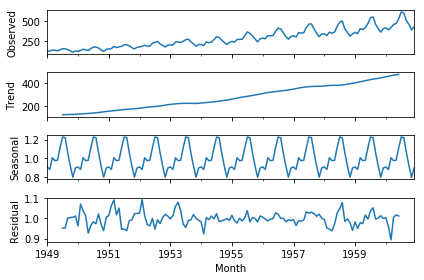

In [22]:
# Decomposição da Série Temporal (TS)
componentes = seasonal_decompose(ts, model='multiplicative')
componentes.plot()
plt.show()

# Avaliando os Resíduos do modelo

  - A média deve ser aproximadamente zero.
  - A variância deve ser constante.
  - Os residuos devem estar normalmente distribuídos .
  - Os residudos NÃO devem possuir correlação. Se possuir correlação, o modelo pode ser melhorado, pois temos informações nos resíduos que podem ser utilizadas no modelo.

In [23]:
# Removendo valores N/A.
residuos = componentes.resid.dropna()

In [24]:
# Verificando a média dos resíduos.
# A média deve ser aproximadamente zero.
residuos.mean()

0.9982356582764106

In [25]:
# Verificando a varância dos resíduos.
# A variância deve ser constante.
residuos.var()

0.0011147849742650655

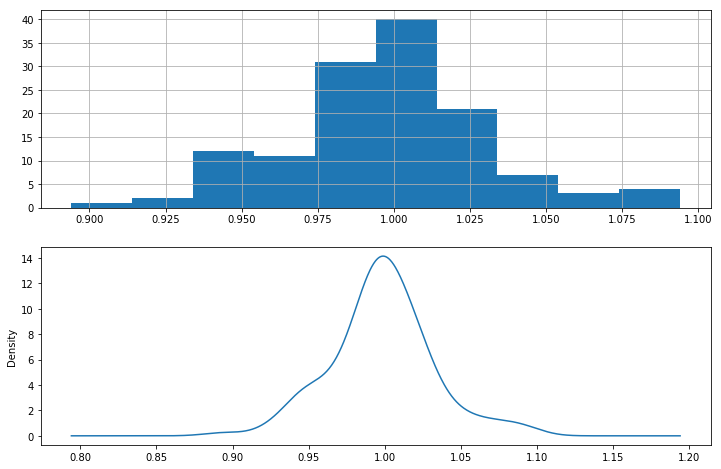

In [26]:
# Verificando a distribuição dos residuos.
# Os residuos devem estar normalmente distribuídos.
plt.figure(figsize=(12,8))
plt.subplot(211)
residuos.hist()

plt.subplot(212)
residuos.plot(kind='kde')
plt.show()

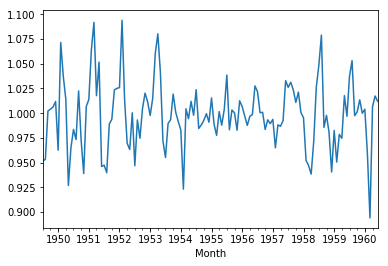

In [27]:
# Plot dos resíduos
# Verificando a aleatoriedade dos resíduos.
residuos.plot()

# Teste de Normalidade Estatística dos Resíduos

In [28]:
from scipy import stats

- Teste de Shapiro-Wilk

In [29]:
#Shapiro-Wilk Test
# normality test
#p <= 0.05: reject H0, not normal
#p > 0.05: fail to reject H0, normal.

print('****** Teste de Shapiro-Wilk ****** \n ')
stat, p = stats.shapiro(residuos)
print('Estatísticas=%.3f, p-value=%.5f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Amostra parece Gaussiana  (Normal) (não rejeitam Hipótese NULA (H0))')
else:
    print('Amostra não parece Gaussiana (Normal) (rejeitam Hipótese NULA (H0))')

****** Teste de Shapiro-Wilk ****** 
 
Estatísticas=0.977, p-value=0.02290
Amostra não parece Gaussiana (Normal) (rejeitam Hipótese NULA (H0))


- Teste de D’Agostino’s K^2

In [30]:
print(' ****** Teste de D’Agostino’s K^2 ****** \n ')

stat, p = stats.normaltest(residuos)
print('Estatísticas=%.3f, p-value=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Amostra parece Gaussiana  (Normal) (não rejeitam Hipótese NULA (H0))')
else:
    print('Amostra não parece Gaussiana (Normal) (rejeitam Hipótese NULA (H0))')

 ****** Teste de D’Agostino’s K^2 ****** 
 
Estatísticas=4.419, p-value=0.10974
Amostra parece Gaussiana  (Normal) (não rejeitam Hipótese NULA (H0))


- Teste de Anderson-Darling

In [31]:
print('****** Teste de Anderson-Darling ****** \n ')

result = stats.anderson(residuos)

print('Estatística: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    
    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
            print('Nível de Significancia: %.3f: Valor Crítico: %.3f, os dados parecem normais (não rejeitam Hipótese NULA (H0))' % (sl, cv))
    else:
            print('Nível de Significancia: %.3f: Valor Crítico: %.3f, os dados não parecem normais (rejeitam Hipótese NULA (H0))' % (sl, cv))


****** Teste de Anderson-Darling ****** 
 
Estatística: 1.167
Nível de Significancia: 15.000: Valor Crítico: 0.560, os dados não parecem normais (rejeitam Hipótese NULA (H0))
Nível de Significancia: 10.000: Valor Crítico: 0.638, os dados não parecem normais (rejeitam Hipótese NULA (H0))
Nível de Significancia: 5.000: Valor Crítico: 0.765, os dados não parecem normais (rejeitam Hipótese NULA (H0))
Nível de Significancia: 2.500: Valor Crítico: 0.892, os dados não parecem normais (rejeitam Hipótese NULA (H0))
Nível de Significancia: 1.000: Valor Crítico: 1.061, os dados não parecem normais (rejeitam Hipótese NULA (H0))


# Autocorrelação dos Resíduos

In [32]:
from statsmodels.graphics.api import qqplot


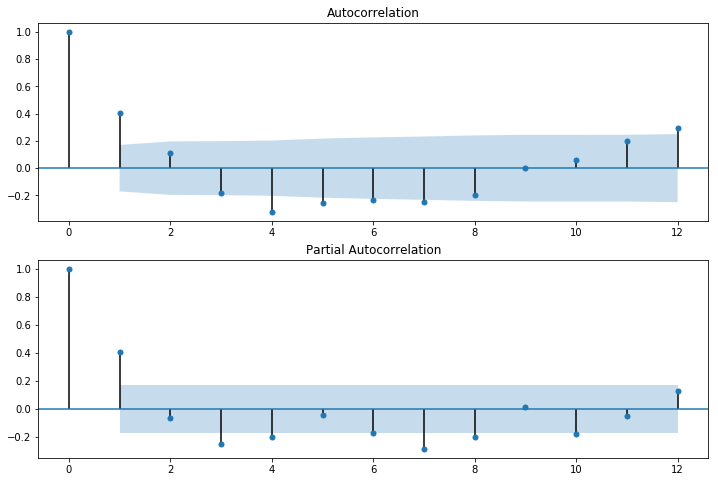

In [33]:
# Verificando a autocorrelação  dos Resíduos- ACF (autocorrelation Function) 

lags = 12

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuos.values.squeeze(), lags=lags, ax=ax1)

# Verificando a autocorrelação - PACF (partial autocorrelation Function) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuos, lags=lags, ax=ax2)

In [34]:
# Verificando a existência de autocorrelação dos Resíduos
# Teste de Ljung-Box para autocorrelação
# p <= 0.05: rejeita a H0, não possui autocorrelação
# p > 0.05: falha em rejeitar a H0, possui autocorrelação

ljungbox_teste = sm.stats.diagnostic.acorr_ljungbox(residuos, lags=12, boxpierce=False)

lbvalue = ljungbox_teste[0] #test statistic
pvalue = ljungbox_teste[1] #p-value based on chi-square distribution

In [35]:
# statistic
lbvalue

array([ 21.97018872,  23.6531364 ,  28.20483799,  42.26139715,
        51.15296121,  58.71350554,  67.69233905,  73.12564753,
        73.12571292,  73.66884306,  79.34507181,  92.07591559])

In [36]:
# pvalue
pvalue

array([  2.76918505e-06,   7.30780065e-06,   3.28965865e-06,
         1.47247976e-08,   8.04661843e-10,   8.21251010e-11,
         4.31800512e-12,   1.16957915e-12,   3.70121986e-12,
         8.63442633e-12,   1.97508513e-12,   1.95467958e-14])